# Using ADMIXTURE to get ancestry fractions and creatining admixture plots.
***

## Step 1. Running ADMIXTURE 
#### Running ADMIXTURE is fairly straightforwad. **Terminal command:** admixture BedFile K

In [2]:
!admixture data/allCombinedLDPruned.bed 3

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 394x139469
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 3.242	Loglikelihood: -1.05529e+07	(delta): 7.81902e+07
2 (EM) 	Elapsed: 3.239	Loglikelihood: -9.98094e+06	(delta): 571917
3 (EM) 	Elapsed: 3.236	

#### ADMIXTURE creates two important files:
* Q.K file - Contains the ancestry fractions **_(file of interest)_**
* P.K file - Contains the allele frequencies

In [4]:
!mv allCombinedLDPruned.* data/

## We will now switch to R programming language to create Admixture plots.

In [95]:
library("plyr")
library("dplyr")
library("ggplot2")
library("reshape2")
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [83]:
#Let's get the information for all individuals.
individualToPopGroupData = read.table('data/allCombinedIndividualsToPop.txt', col.names = c("PopGroup", "IndividualID"), header = FALSE)
allCombinedFAMData = read.table('data/allCombinedLDPruned.fam', header = FALSE, col.names = c("FamilyID", "IndividualID", "N1", "N2", "N3", "N4"))
allCombinedFAMData = data.frame("IndividualID" = allCombinedFAMData[ , 2:2])

In [84]:
head(individualToPopGroupData)
head(allCombinedFAMData)

,PopGroup,IndividualID
,<fct>,<fct>
1,IBS,HG01500
2,IBS,HG01501
3,IBS,HG01503
4,IBS,HG01504
5,IBS,HG01506
6,IBS,HG01507


,IndividualID
,<fct>
1,HG01500
2,HG01501
3,HG01503
4,HG01504
5,HG01506
6,HG01507


In [85]:
#We will now merge the Population Group data with the FAM file data.
allCombinedFAMandPopGroupData = join(allCombinedFAMData, individualToPopGroupData)
print(allCombinedFAMandPopGroupData)

Joining by: IndividualID



    IndividualID PopGroup
1        HG01500      IBS
2        HG01501      IBS
3        HG01503      IBS
4        HG01504      IBS
5        HG01506      IBS
6        HG01507      IBS
7        HG01509      IBS
8        HG01510      IBS
9        HG01512      IBS
10       HG01513      IBS
11       HG01515      IBS
12       HG01516      IBS
13       HG01518      IBS
14       HG01519      IBS
15       HG01521      IBS
16       HG01522      IBS
17       HG01524      IBS
18       HG01525      IBS
19       HG01527      IBS
20       HG01528      IBS
21       HG01530      IBS
22       HG01531      IBS
23       HG01536      IBS
24       HG01537      IBS
25       HG01602      IBS
26       HG01603      IBS
27       HG01605      IBS
28       HG01606      IBS
29       HG01607      IBS
30       HG01608      IBS
31       HG01610      IBS
32       HG01612      IBS
33       HG01613      IBS
34       HG01615      IBS
35       HG01617      IBS
36       HG01618      IBS
37       HG01619      IBS
38       HG0

In [86]:
#Now let's get their Ancestry estimates obtained from Admixture.
admixtureAncestryEstimates = read.table("data/allCombinedLDPruned.3.Q", header = FALSE)
print(admixtureAncestryEstimates)

          V1       V2       V3
1   0.000010 0.000010 0.999980
2   0.000010 0.000010 0.999980
3   0.000010 0.000010 0.999980
4   0.000010 0.000010 0.999980
5   0.000010 0.000010 0.999980
6   0.000010 0.000010 0.999980
7   0.000010 0.000010 0.999980
8   0.000010 0.000010 0.999980
9   0.000010 0.000010 0.999980
10  0.000010 0.000010 0.999980
11  0.000010 0.000010 0.999980
12  0.000010 0.000010 0.999980
13  0.000010 0.000010 0.999980
14  0.000010 0.000010 0.999980
15  0.000010 0.000010 0.999980
16  0.000010 0.000010 0.999980
17  0.000010 0.000010 0.999980
18  0.000010 0.000010 0.999980
19  0.000010 0.000010 0.999980
20  0.000010 0.000010 0.999980
21  0.000010 0.000010 0.999980
22  0.000010 0.000010 0.999980
23  0.000010 0.000010 0.999980
24  0.000010 0.000010 0.999980
25  0.000010 0.002727 0.997263
26  0.000010 0.000010 0.999980
27  0.000012 0.000010 0.999978
28  0.000010 0.000010 0.999980
29  0.000010 0.000010 0.999980
30  0.000010 0.000010 0.999980
31  0.000010 0.000010 0.999980
32  0.00

In [87]:
#Combine the ancestry estimates with Individual IDs and Population Groups.
combinedAncestryEstimatesData = cbind(allCombinedFAMandPopGroupData, admixtureAncestryEstimates)
print(combinedAncestryEstimatesData)

    IndividualID PopGroup       V1       V2       V3
1        HG01500      IBS 0.000010 0.000010 0.999980
2        HG01501      IBS 0.000010 0.000010 0.999980
3        HG01503      IBS 0.000010 0.000010 0.999980
4        HG01504      IBS 0.000010 0.000010 0.999980
5        HG01506      IBS 0.000010 0.000010 0.999980
6        HG01507      IBS 0.000010 0.000010 0.999980
7        HG01509      IBS 0.000010 0.000010 0.999980
8        HG01510      IBS 0.000010 0.000010 0.999980
9        HG01512      IBS 0.000010 0.000010 0.999980
10       HG01513      IBS 0.000010 0.000010 0.999980
11       HG01515      IBS 0.000010 0.000010 0.999980
12       HG01516      IBS 0.000010 0.000010 0.999980
13       HG01518      IBS 0.000010 0.000010 0.999980
14       HG01519      IBS 0.000010 0.000010 0.999980
15       HG01521      IBS 0.000010 0.000010 0.999980
16       HG01522      IBS 0.000010 0.000010 0.999980
17       HG01524      IBS 0.000010 0.000010 0.999980
18       HG01525      IBS 0.000010 0.000010 0.

## If you look closely at the ancestry data, you will observe that **ADMIXTURE** does not give us a lable for the K-population clusters it creates. We have to assign the labels ourselves.

> ## **This is precisely why we used three reference populations: IBS, PEL, & YRI; in addition to CLM individuals.**

+ Based on the ancestry estimates, we observe that:
    + V1 - NativeAmerican
    + V2 - African (from YRI)
    + V3 - European (from IBS)

In [88]:
#Rename the columns.
combinedAncestryEstimatesData = combinedAncestryEstimatesData %>% dplyr::rename("European" = "V3", 
                                    "African" = "V2",
                                    "NativeAmerican" = "V1",)
print(combinedAncestryEstimatesData)

    IndividualID PopGroup NativeAmerican  African European
1        HG01500      IBS       0.000010 0.000010 0.999980
2        HG01501      IBS       0.000010 0.000010 0.999980
3        HG01503      IBS       0.000010 0.000010 0.999980
4        HG01504      IBS       0.000010 0.000010 0.999980
5        HG01506      IBS       0.000010 0.000010 0.999980
6        HG01507      IBS       0.000010 0.000010 0.999980
7        HG01509      IBS       0.000010 0.000010 0.999980
8        HG01510      IBS       0.000010 0.000010 0.999980
9        HG01512      IBS       0.000010 0.000010 0.999980
10       HG01513      IBS       0.000010 0.000010 0.999980
11       HG01515      IBS       0.000010 0.000010 0.999980
12       HG01516      IBS       0.000010 0.000010 0.999980
13       HG01518      IBS       0.000010 0.000010 0.999980
14       HG01519      IBS       0.000010 0.000010 0.999980
15       HG01521      IBS       0.000010 0.000010 0.999980
16       HG01522      IBS       0.000010 0.000010 0.9999

## Let's look at population specific averages

In [106]:
options(scipen = 10000) 
combinedAncestryEstimatesData %>% group_by(PopGroup) %>% summarise_at(vars(European, African, NativeAmerican), funs(mean))

PopGroup,European,African,NativeAmerican
<fct>,<dbl>,<dbl>,<dbl>
CLM,0.6642243617,0.063547447,0.27222819149
IBS,0.9981738879,0.001815897,0.00001021495
PEL,0.0963265059,0.027661388,0.87601212941
YRI,0.0003317407,0.999658083,0.00001017593


In [100]:
#Bringing ancestry in one column.
combinedAncestryEstimatesDataSorted = arrange(combinedAncestryEstimatesData, European, African, NativeAmerican, group_by = PopGroup)

row.names(combinedAncestryEstimatesDataSorted) <- NULL
combinedAncestryEstimatesDataSorted$index= as.numeric(rownames(combinedAncestryEstimatesDataSorted))

combinedAncestryEstimatesDataSortedMelt = melt(data = combinedAncestryEstimatesDataSorted, id.vars = c("IndividualID", "PopGroup", "European", "African", "NativeAmerican", "index"), measure.vars = c("European", "African", "NativeAmerican"))

colnames(combinedAncestryEstimatesDataSortedMelt)[7] <- 'Ancestry'
colnames(combinedAncestryEstimatesDataSortedMelt)[8] <- 'AncestryFraction'

print(combinedAncestryEstimatesDataSortedMelt[c('IndividualID', "PopGroup", "Ancestry", "AncestryFraction", "index")])

     IndividualID PopGroup       Ancestry AncestryFraction index
1         HG01565      PEL       European         0.000010     1
2         HG01920      PEL       European         0.000010     2
3         HG01923      PEL       European         0.000010     3
4         HG01926      PEL       European         0.000010     4
5         HG01927      PEL       European         0.000010     5
6         HG01936      PEL       European         0.000010     6
7         HG01938      PEL       European         0.000010     7
8         HG01948      PEL       European         0.000010     8
9         HG01951      PEL       European         0.000010     9
10        HG01961      PEL       European         0.000010    10
11        HG01968      PEL       European         0.000010    11
12        HG01973      PEL       European         0.000010    12
13        HG01974      PEL       European         0.000010    13
14        HG01976      PEL       European         0.000010    14
15        HG01991      PE

## We will now create Admixture plots.

In [101]:
colors  <- c("African" = "blue", "European" = "orange", "NativeAmerican" = "red")

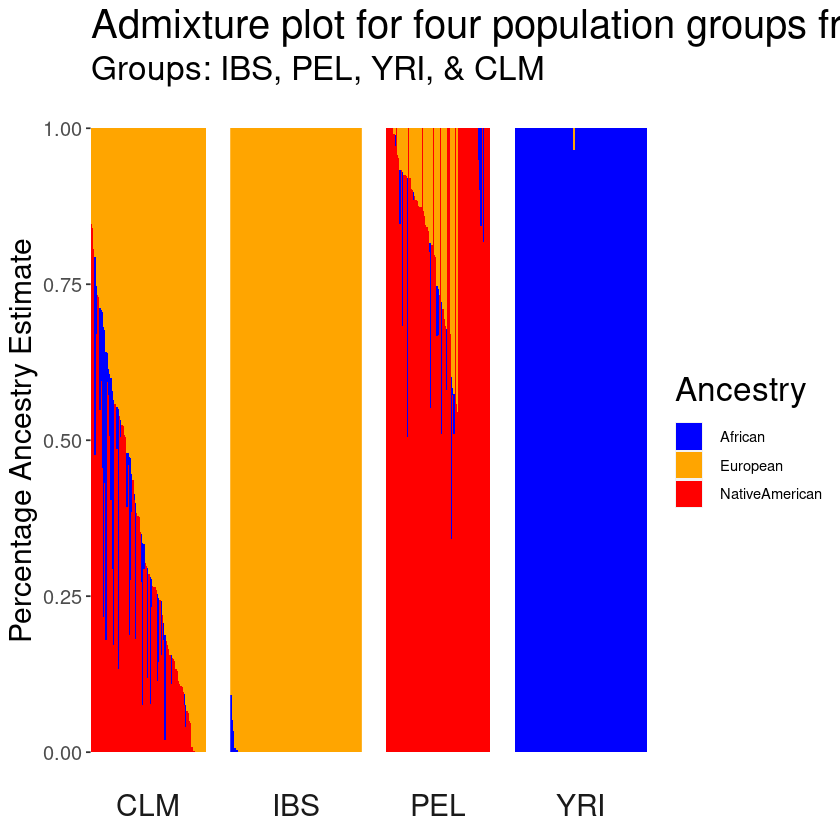

In [102]:
ggplot(data=combinedAncestryEstimatesDataSortedMelt, aes(x=as.character(index), y=AncestryFraction, fill=Ancestry)) +
    geom_bar(stat="identity", width=1) + facet_grid(cols = vars(PopGroup), scales = "free", space = "free", drop = TRUE, switch="both") +
    scale_fill_manual(values=colors) + 
    labs(y="Percentage Ancestry Estimate", title = "Admixture plot for four population groups from 1KGP", subtitle = "Groups: IBS, PEL, YRI, & CLM") +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), panel.spacing.x=unit(1, "lines"), 
          strip.background = element_blank(), panel.background = element_blank(), axis.text=element_text(size=12),
          axis.title=element_text(size=18), strip.text.x = element_text(size = 18), title = element_text(size = 20))
